<a href="https://colab.research.google.com/github/HakanAknc/Machine_Learning_py/blob/main/ProjeDeneme5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("train.csv")  #veriyi okuma

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns   #kolonlar

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df = df[['Pclass','Sex','Age','Fare','Survived']]  #bu kolonları filitreliyorum datafram'den
df   # datafram'ı tekrar güncelliyorum yeni datafram ağaşdaki gibidir

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
x = df.drop('Survived',axis='columns')  # survived kolonunu ayırıyorum
y = df.Survived   # buda benim y değişkenlerim bunu da ayırıyorum

In [ ]:
x  # x değerlerimin son hali

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
y  # y değerlerimin son hali

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
dummies = pd.get_dummies(x.Sex)   # numpy'ın Noun değerleri var mı kontrol ediliyor.
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
x = pd.concat([x,dummies],axis='columns')   # burda ilgili kolonları bağladık
x.head()  # x değerlerimin son hali

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
x = x.drop('Sex',axis='columns')   # artık sex kolonuna ihtiacım yok düşürdük
x.head(10)  # ilk on x verisini getirdi

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,NaN,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [ ]:
x.columns[x.isna().any()]   # bu fonksiyon hangi kolonda nuon değer olduğunu yazdırıyor  görüldüğü gibi age de noun değer varmış.

Index(['Age'], dtype='object')

In [ ]:
x[x.isna().any(axis=1)==True]  # bu kod ile de noun olan bütün değerleri getirebilirim. toplam 177 satır nounmuş

,Pclass,Age,Fare,female,male
5,3,NaN,8.4583,0,1
17,2,NaN,13.0000,0,1
19,3,NaN,7.2250,1,0
26,3,NaN,7.2250,0,1
28,3,NaN,7.8792,1,0
...,...,...,...,...,...
859,3,NaN,7.2292,0,1
863,3,NaN,69.5500,1,0
868,3,NaN,9.5000,0,1
878,3,NaN,7.8958,0,1


In [ ]:
x['Age'].mean()   # ortalama yaş değeri

29.69911764705882

In [ ]:
x['Age'] = x['Age'].fillna(x['Age'].mean())   # ortalama ile dolduruldu
x.head(10)  # ilk on satırı ortalama değer ile doldurmuş hali

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [ ]:
# Modelin Eğitilmesi
# veri setini alıyor ve ayrıştırıyoruz.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_train)

712

In [ ]:
len(x_test)

179

In [ ]:
# Sklearn kullaran navie bayes ile modeli eğitiyoruz

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()   # model atadım

In [ ]:
model.fit(x_train, y_train)  # modelimi eğitiyorum

GaussianNB()

In [ ]:
model.score(x_test, y_test)  # %70 oranında doğru tahmin ediyor.

0.7988826815642458

In [ ]:
y_test[:10]   # y testinin değerleri

493    0
210    0
670    1
23     1
526    1
765    1
226    1
632    1
837    0
322    1
Name: Survived, dtype: int64

In [ ]:
x_test[:10]  # x testinin değerleri

,Pclass,Age,Fare,female,male
493,1,71.000000,49.5042,0,1
210,3,24.000000,7.0500,0,1
670,2,40.000000,39.0000,1,0
23,1,28.000000,35.5000,0,1
526,2,50.000000,10.5000,1,0
765,1,51.000000,77.9583,1,0
226,2,19.000000,10.5000,0,1
632,1,32.000000,30.5000,0,1
837,3,29.699118,8.0500,0,1
322,2,30.000000,12.3500,1,0


In [ ]:
model.predict(x_test[:10])   # ilk 10 verinin tahmin sonuçları.

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
model.predict_proba(x_test[:10])  # değerler için hayatta kalma, kalamama değerleri brinci elemanın hayatta kalma olasılığı % 99 ölme olasılığı % 1

array([[0.8582024 , 0.1417976 ],
       [0.98936328, 0.01063672],
       [0.04591375, 0.95408625],
       [0.92231306, 0.07768694],
       [0.05468227, 0.94531773],
       [0.00358007, 0.99641993],
       [0.97485627, 0.02514373],
       [0.93150867, 0.06849133],
       [0.99059692, 0.00940308],
       [0.0512906 , 0.9487094 ]])

In [ ]:
# Doğruluk oranını hesapla
accuracy = model.score(x_test, y_test)
print(f'Doğruluk Oranı: {accuracy:.2f}')

Doğruluk Oranı: 0.80


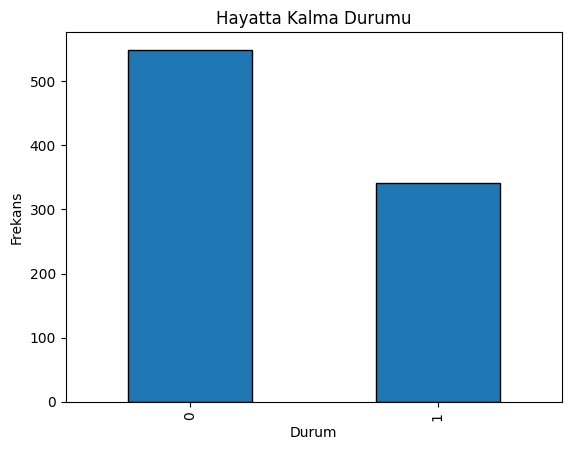

In [ ]:
y.value_counts().plot(kind='bar', edgecolor='black')
plt.title('Hayatta Kalma Durumu')
plt.xlabel('Durum')
plt.ylabel('Frekans')
plt.show()

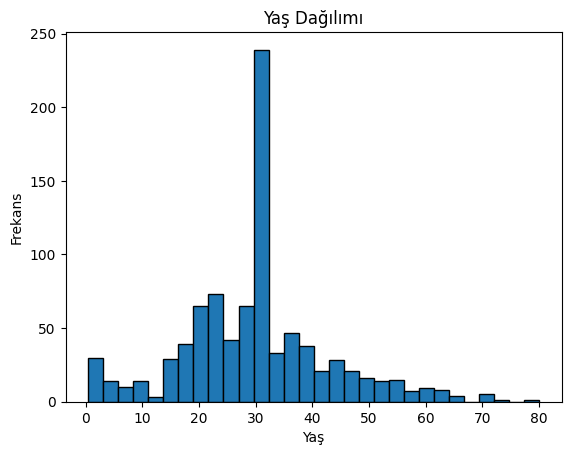

In [ ]:
plt.hist(x['Age'], bins=30, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

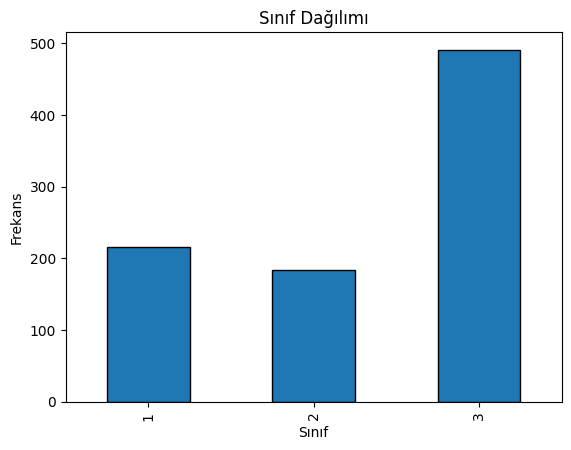

In [ ]:
x['Pclass'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Frekans')
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Mo

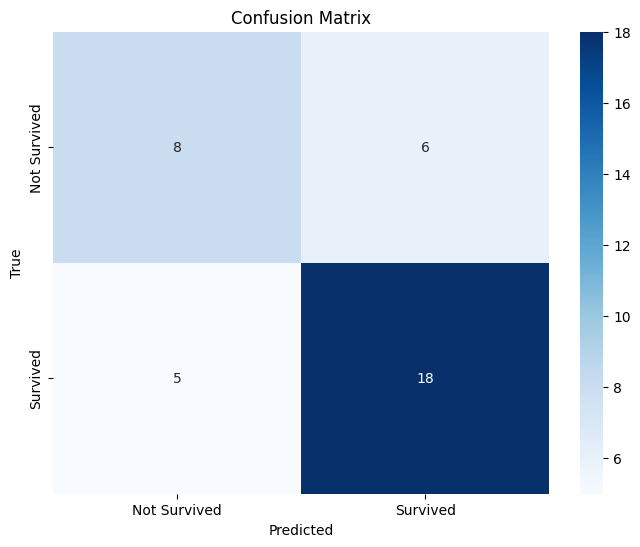

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic verilerini yükle
titanic_data = pd.read_csv("train.csv")  # CSV dosya adınıza uygun bir değer vermelisiniz

# Veri setini incele
print(titanic_data.head())

# Veri setindeki eksik değerleri doldur veya çıkar
titanic_data = titanic_data.dropna()  # Eksik değerleri içeren satırları çıkarabilirsiniz, başka bir strateji de kullanabilirsiniz

# Kategorik değişkenleri one-hot encode et
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

# Bağımsız değişkenleri ve hedef değişkeni seç
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_data['Survived']

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GaussianNB modelini oluştur
model = GaussianNB()

# Modeli eğit
model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Model doğruluğunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion matrix ve heatmap çiz
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<Axes: xlabel='Sex'>

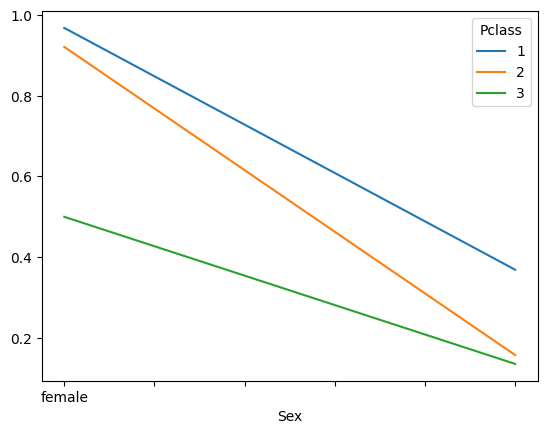

In [ ]:
df.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()